<a href="https://colab.research.google.com/github/sonG1031/ML_DL_STUDY/blob/main/%5BML%5D%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 자료  
- 지니 불순도
    - https://smalldataguru.com/%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACdecision-tree%EC%9D%98-%EC%A7%80%EB%8B%88-%EB%B6%88%EC%88%9C%EB%8F%84gini-impurity%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8C/
- 결정 트리
    - https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree

In [1]:
# 데이터 준비
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


판다스 데이터 프레임의 유용한 메서드
- info()
    - 데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인하는 데 유용.
        - 누락된 값이 있다면 그 데이터를 버리거나 평균값으로 채운 후 사용할 수 있음.
        - 어떤 방식이 최선인지 미리 알 수 없으므로 두 가지 모두 시도해보는게 좋음.
        - 항상 훈련 세트의 통계값으로 테스트 세트를 변환한다는 것을 잊으면 안됨.
        - 즉, 훈련 세트의 평균값으로 테스트 세트의 누락된 값을 채워야함.

- describe()
    - 열에 대한 간략한 통계를 출력함.
    - 평균(mean), 표준편차(std), 최소(min), 최대(max), 1/2/3 사분위수를 볼 수 있음.
        - 사분위수는 데이터를 순서대로 4등분 한 값임.
        - 예를 들어 2사분위수(중간값)는 데이터를 일렬로 늘어놓았을 때 정중앙 값임.
 

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


위 정보로 알 수 있는 것은 알코올 도수, 당도, pH 값의 스케일이 다름.  
따라서 특성을 표준화 해야함.

In [4]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [5]:
# 데이터 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 샘플 개수가 충분히 많으므로 20% 정도만 테스트 세트로 설정 -> test_size=0.2
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

(5197, 3) (1300, 3)


In [6]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


# 결정 트리(Decision Tree)
- 예 / 아니오에 대한 질문을 이어나가면서 정답을 찾아 학습하는 알고리즘
- 비교적 예측 과정을 이해하기 쉽고 성능도 뛰어남.  

### 알고리즘
- 불순도를 기준으로 사용해 정보 이득이 최대가 되도록 노드를 분할함.
    - 노드를 순수하게 나눌수록 정보 이득이 커짐.
- 새로운 샘플에 대해 예측할 때에는 노드의 질문에 따라 트리를 이동함.
- 마지막에 도달한 노드의 클래스 비율을 보고 예측을 만듬.

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

# 과대적합
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


plot_tree() 함수를 사용해 결정 트리를 이해하기 쉬운 트리 그림으로 출력해 줌.

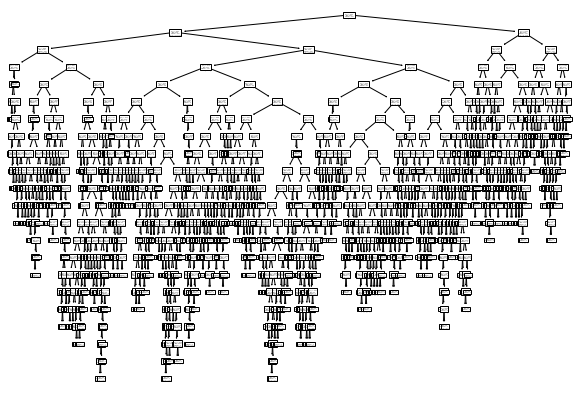

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

## 노드란?
- 노드는 결정 트리를 구성하는 핵심 요소
- 노드는 훈련 데이터의 특성에 대한 테스트를 표현
- 가지(branch)는 테스트의 결과(True,False)를 나타내며 일반적으로 하나의 노드는 2개의 가지를 가짐.

루트 노드 : 맨위의 노드  
리프 노드 : 맨 아래 끝에 달린 노드

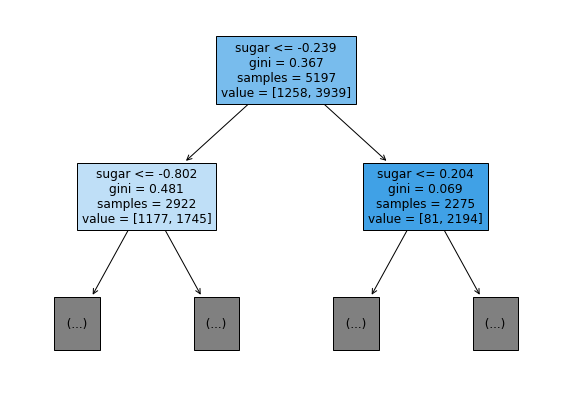

In [11]:
plt.figure(figsize=(10, 7))
# 깊이 제한
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

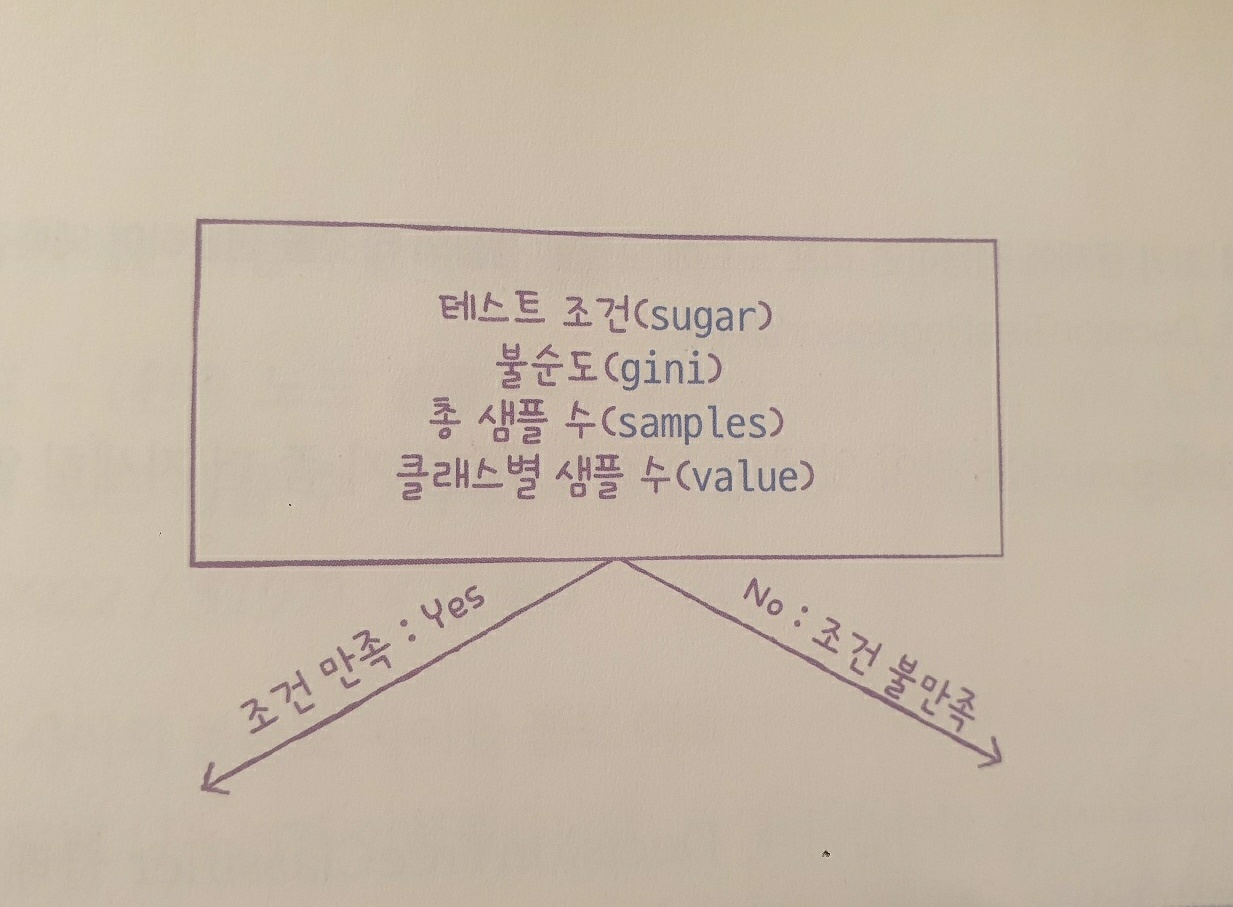

## 불순도
- 결정 트리가 최적의 질문을 찾기 위한 기준
- criterion 매개변수에 사용되는 것.

## 지니 불순도(gini impurity)
- 클래스의 비율을 제곱해서 더한 다음 1에서 뺀 값.
- 지니 불순도 = 1 - (음성 클래스의 비율^2 + 양성 클래스의 비율^2)
- 다중 클래스 문제라면 클래스만 더 많아지고 계산하는 방법은 동일함.

루트 노드의 지니 불순도는  
1 - ((1258 / 5197)^2 + (3939 / 5197)^2) = 0.367  

순수 노드 : 노드에 하나의 클래스만 있어 지니 불순도가 0이 되는 노드

### 결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다.

### 부모 노드와 자식 노드의 불순도 차이를 계산하는 방법
- 먼저 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더함.
- 그다음 부모 노드의 불순도에서 빼면 됨.

위의 트리 그림을 예를 들면  
루트 노드를 부모 노드라 하고, 왼쪽 노드와 오른쪽 노드가 자식 노드가 됨.
>>
부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도
>>
0.367 - (2922 / 5197) * 0.481 - (2275 / 5197) * 0.069 = 0.066


## 정보 이득(information gain)
- 부모와 자식 노드 사이의 불순도 차이  
- 즉, 정보 이득이 최대가 되도록 데이터를 나눔.

## 엔트로피 불순도(entropy impurity)
- 지니 불순도처럼 노드의 클래스 비율을 사용함.
- 하지만 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱함.  

예를 들어 루트 노드의 엔트로피 불순도는  
>>
-음성 클래스 비율 * log2(음성 클래스 비율) - 양성 클래스 비율 * log2(양성 클래스 비율)
>>
-(1258 / 5197) * log2(1258 / 5197) - (3939 / 5197) * log2(3939 / 5197) = 0.798

## 가지치기
- 결정 트리의 성장을 제한하는 방법
- 사이킷런의 결정 트리 알고리즘은 여러 가지 가지치기 매개변수를 제공함.


#### 가지치기를 해야하는 이유  
- 결정 트리는 제한 없이 성장 하면 훈련 세트에 과대적합 되기 쉬움.  
- 즉, 훈련 세트에는 아주 잘 맞지만 테스트 세트에서 점수가 그에 못 미치기 때문.
    - 이를 두고 일반화가 잘 안될 것 같다고 말함.

#### 가지치기를 하는 가장 간단한 방법
- 자라날 수 있는 트리의 최대 깊이를 지정하는 것

In [12]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


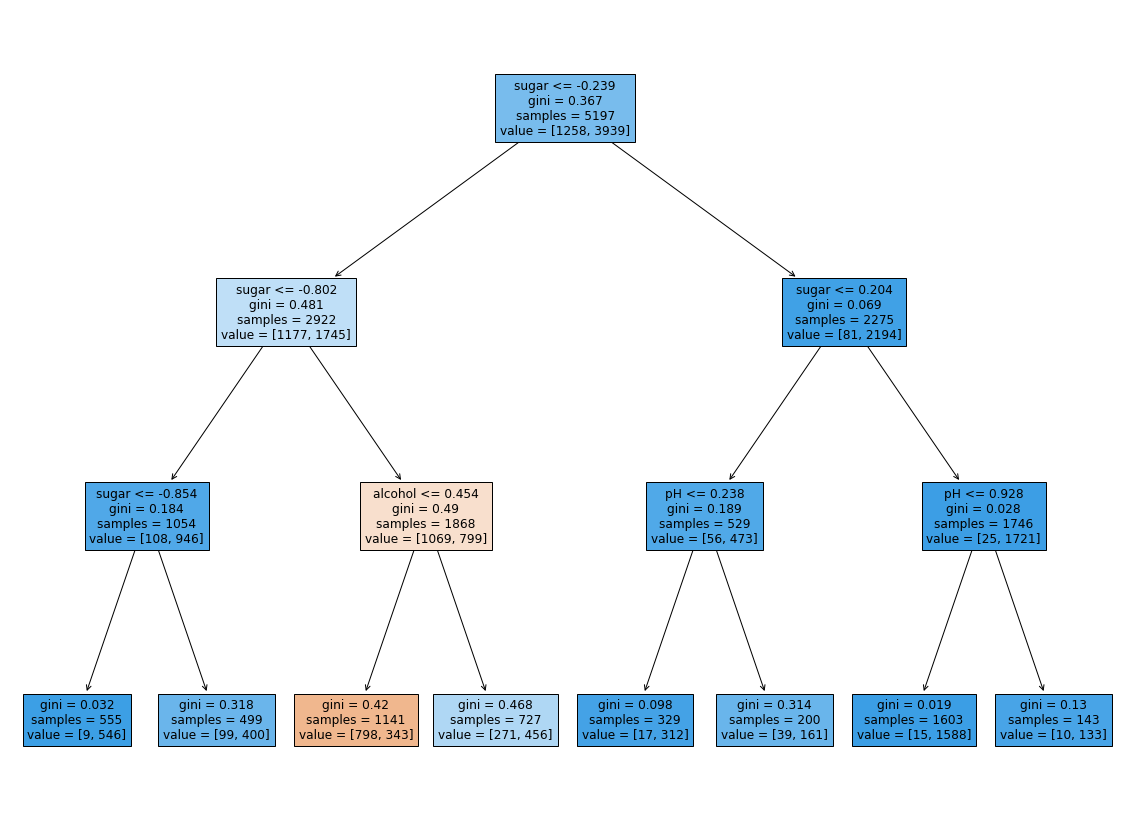

In [13]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 결정 트리 알고리즘은 표준화 전처리를 할 필요가 없다!
결정 트리 알고리즘은 불순도를 기준으로 샘플을 나누는데  
불순도는 클래스별 비율을 가지고 계산하기 때문.  
즉, 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일은 계산에 영향이 없음.

In [14]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


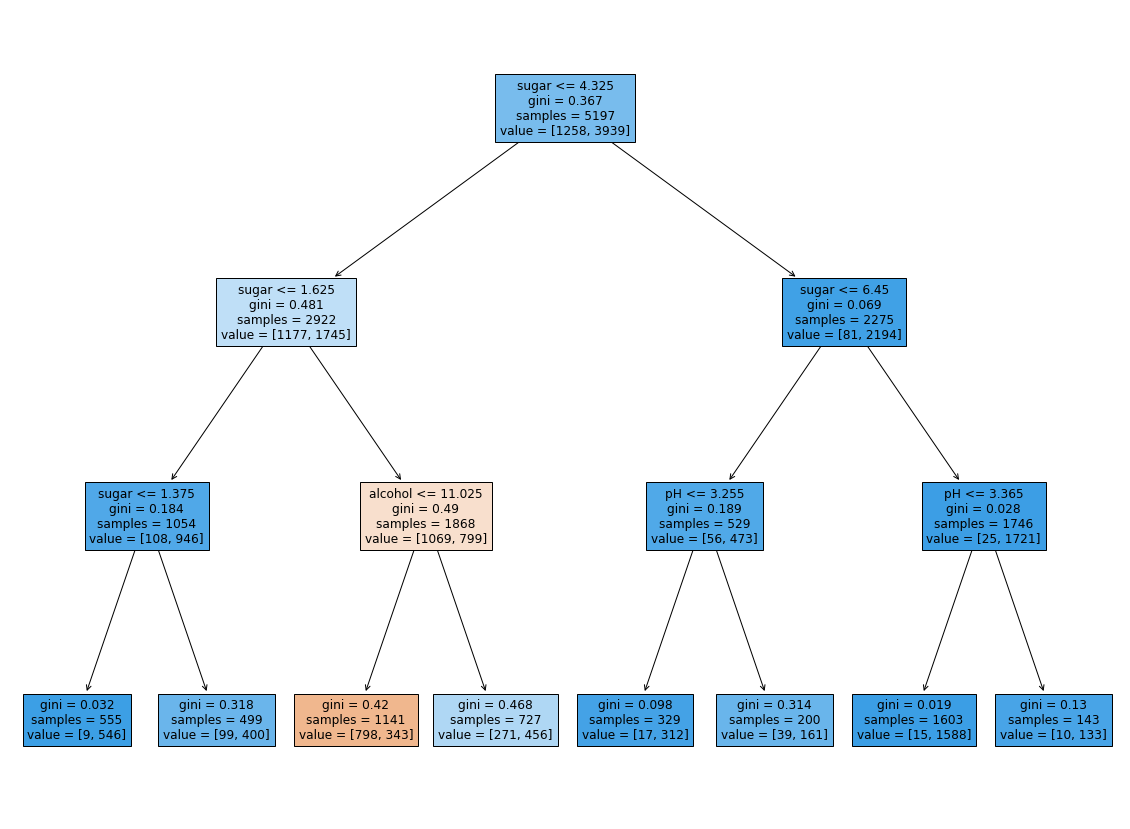

In [15]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 특성 중요도
- 결정 트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값
- 이것을 계산할 수 있는 것이 결정 트리의 큰 장점중 하나임.

결정 트리는 어떤 특성이 가장 유용한지 나타내는 **특성 중요도**를 계산해줌.  
특성 중요도는 결정 트리 모델의 feature_importances_ 속성에 저장됨.

In [16]:
print(dt.feature_importances_)
# 알코올 도수, 당도, pH
# 당도의 특성 중요도가 가장 높음
# 이 값을 모두 더하면 1이 됨.

[0.12345626 0.86862934 0.0079144 ]


특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산함.  
특성 중요도를 활용하면 결정 트리 모델을 특성 선택에 활용할 수 있음.

0.8874350586877044
0.8615384615384616


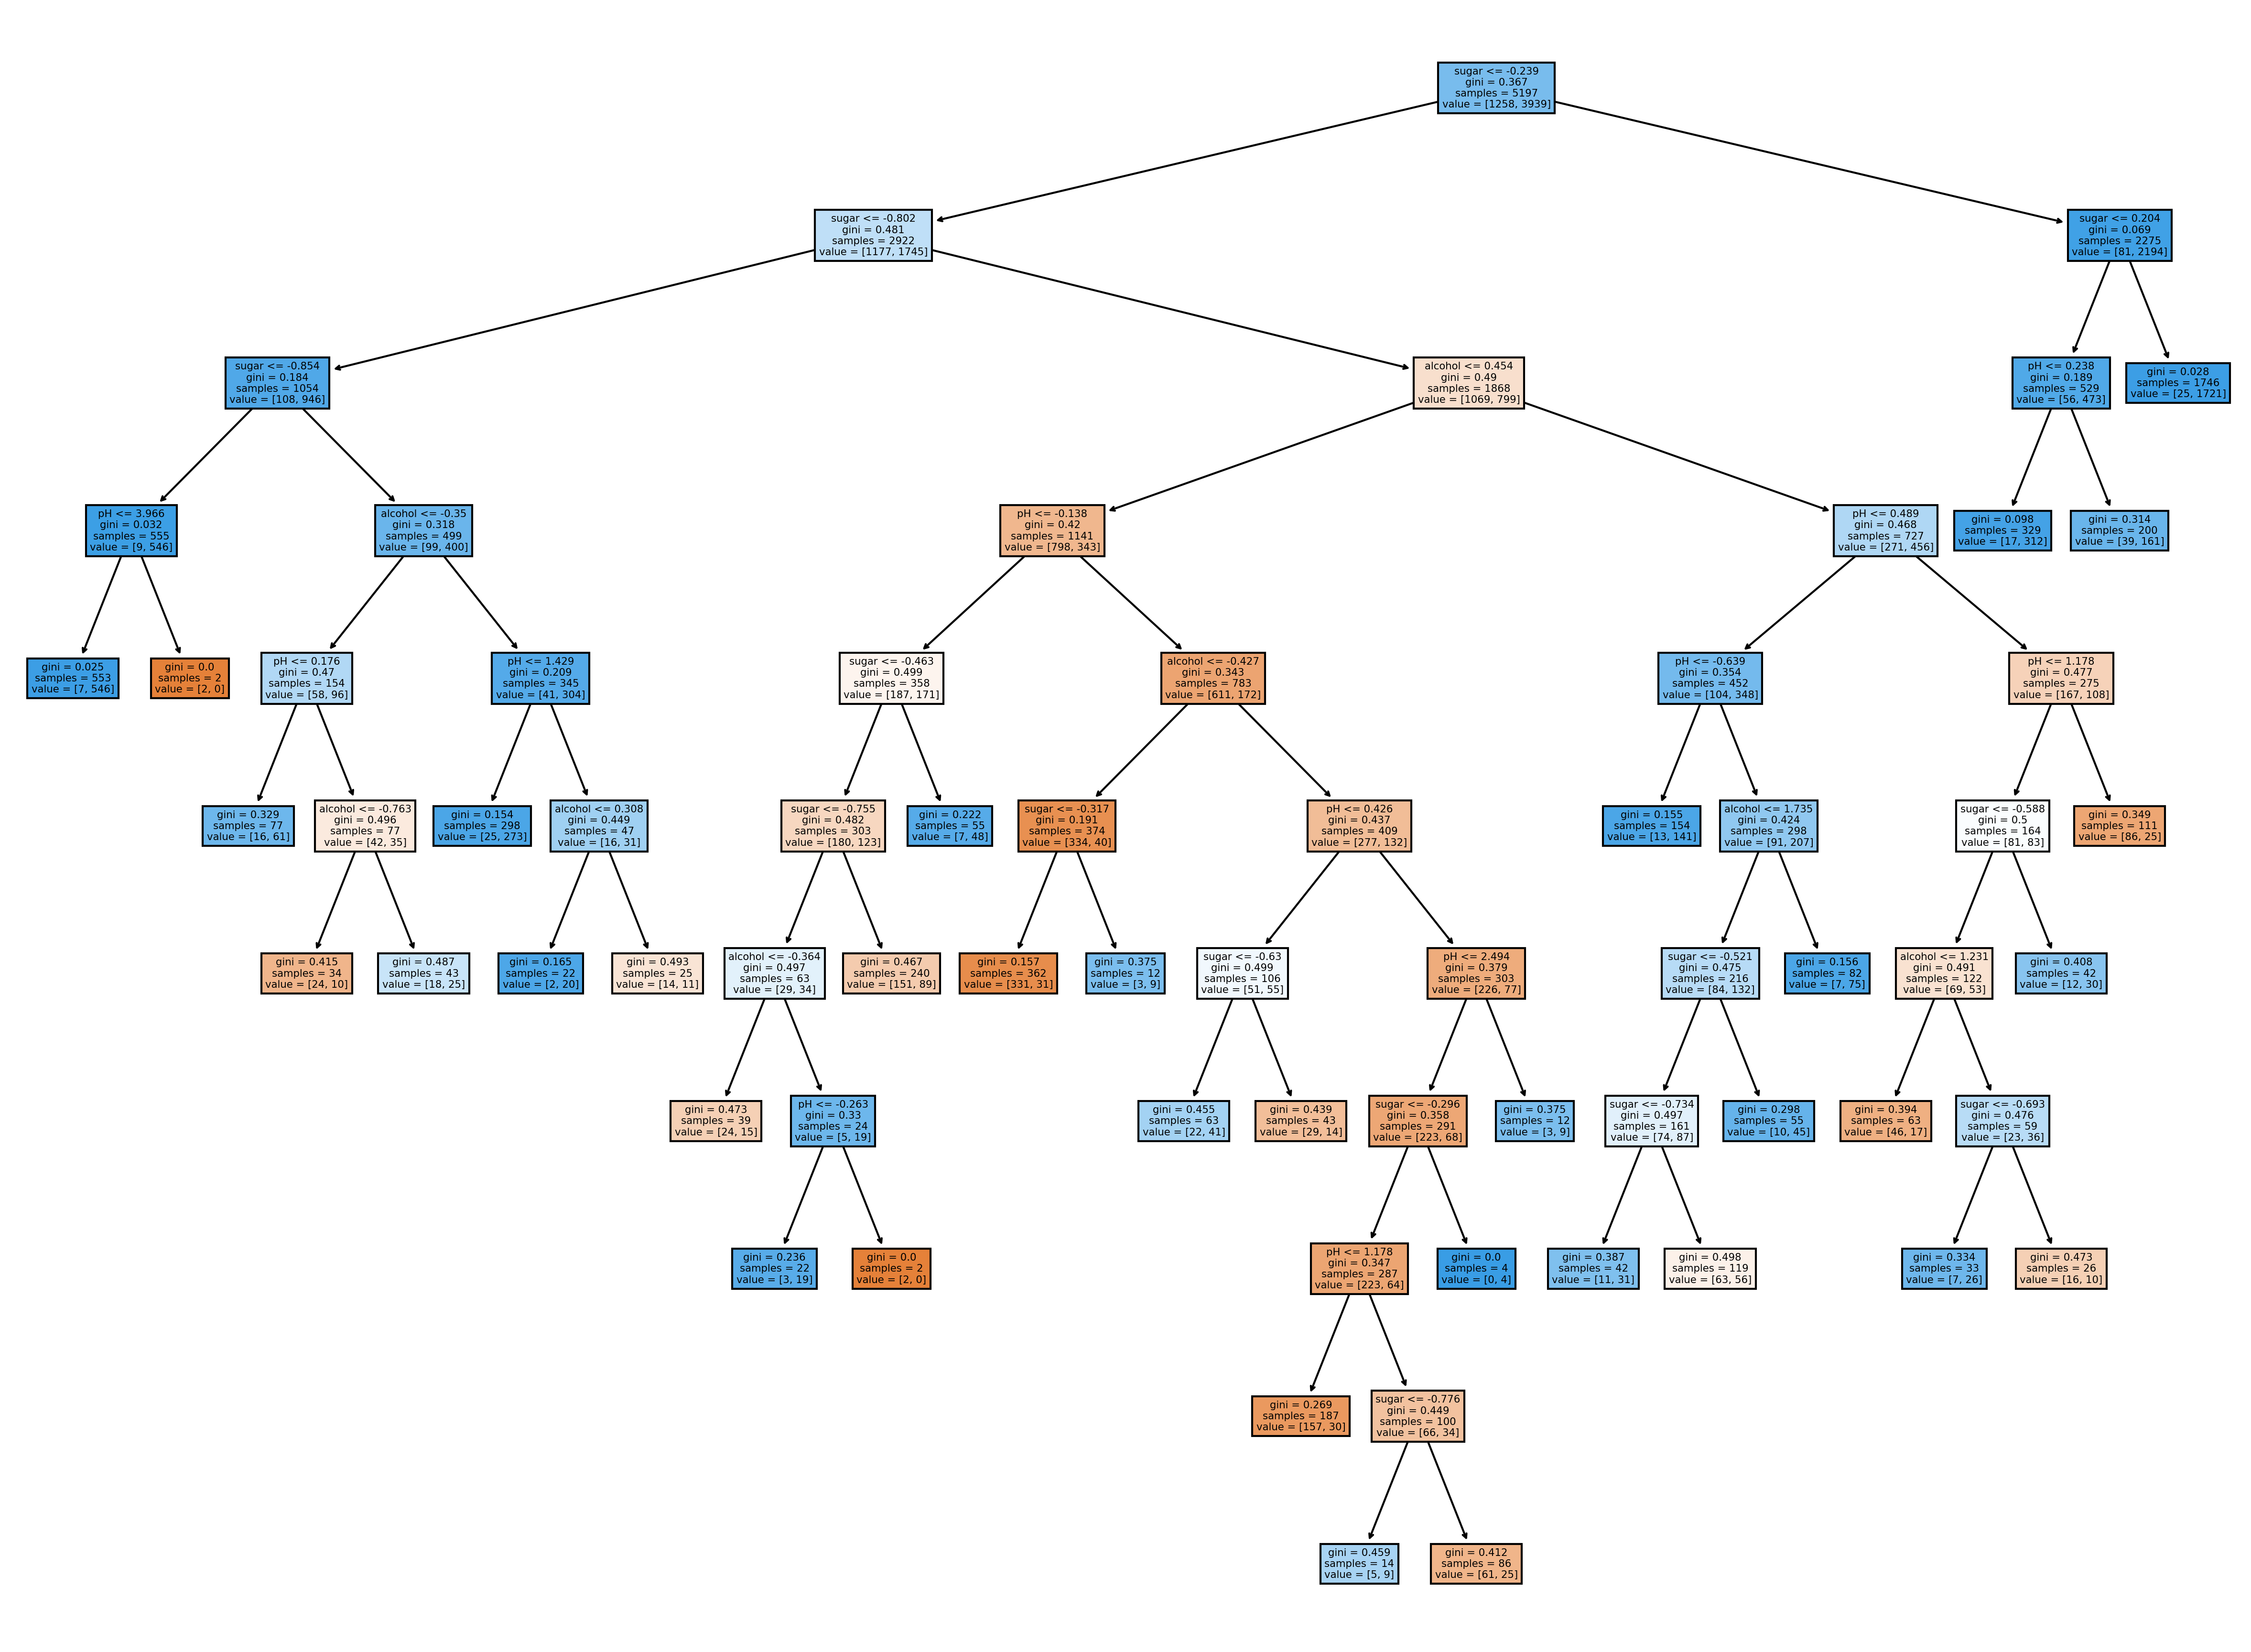

In [17]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(20, 15), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()